In [57]:
# Up-sampling effort: randomly duplicating observations from the minority class 
# to reinforce its signal

In [58]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [59]:
# module for resampling
from sklearn.utils import resample

In [60]:
# os.getcwd()

In [61]:
# os.listdir(os.getcwd())

In [62]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\all_param.csv")
all_param_df.shape


(39624, 351)

In [63]:
# separate classes in dataframes of success/failure
df_fail = all_param_df[all_param_df.suc_class==0]
df_succ = all_param_df[all_param_df.suc_class==1]

In [64]:
df_fail.shape

(38818, 351)

In [65]:
df_succ.shape

(806, 351)

In [66]:
# Upsaple Minority class
df_succ_upsampled = resample(df_succ, replace=True, n_samples=38000, random_state=2)

# combine failed with upsampled minority class into new dataframe
df_upsampled = pd.concat([df_fail, df_succ_upsampled])

# display new class counts
df_upsampled.suc_class.value_counts()

0    38818
1    38000
Name: suc_class, dtype: int64

In [67]:
# # reindex the new upsampled dataframe
# df_upsampled.reindex()

In [68]:
# df_upsampled

In [69]:
# # read the csv y_data file into Pandas 
# y_parm_df = pd.read_csv("reduced_data\\y_params.csv")
# y_parm_df.shape

In [70]:
# using binary classification for logistic regression
y_class = df_upsampled['suc_class']

In [71]:
y_class

0        0
1        0
2        0
3        0
4        0
        ..
39384    1
39384    1
24162    1
38226    1
37100    1
Name: suc_class, Length: 76818, dtype: int64

In [72]:
# create new X parameters df
x_data = df_upsampled.drop(['appid','maxccu','success_class','suc_class','followers','positive', 'negative', 'totaltags']  , axis=1)

In [73]:
x_data.shape

(76818, 343)

In [74]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_class, random_state=5)

In [75]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [76]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler().fit(X_train)

In [77]:
# apply the trained scales (MinMax) to the training and testing data

X_train_scaled = x_scaler.transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

In [78]:
# Instantiate and Train model
y = y_train
X = X_train_scaled 

clf_1 = LogisticRegression(max_iter=1000).fit(X, y)

In [79]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {clf_1.score(X_train, y_train)}")
print(f"Testing Data Score: {clf_1.score(X_test_scaled, y_test)}")

Training Data Score: 0.4954958082377241
Testing Data Score: 0.8405102837802656


In [80]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = clf_1.predict(X_test_scaled)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      9692
           1       0.93      0.73      0.82      9513

    accuracy                           0.84     19205
   macro avg       0.86      0.84      0.84     19205
weighted avg       0.86      0.84      0.84     19205



In [81]:
# thinking about baseline results:
# Support is balanced due to sampling adjustments
# Percision: for no success: 78%, better for successful games: 94%
# Recall: Fraction of positives found, higher for fails than for positives
# f1 score: 84%

<AxesSubplot:>

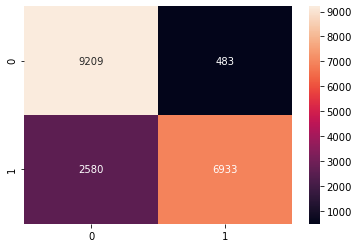

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf_1.predict(X_test_scaled )
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [84]:
# Look at co-efficients for meaning

print(x_data.columns.shape, clf_1.coef_.shape)
new_col = np.reshape(clf_1.coef_, -1)
print(new_col.shape)
features_list = pd.DataFrame(zip(x_data.columns, new_col))
features_list = features_list.sort_values(by=[1], ascending=False)

import pandas
pandas.set_option('display.max_rows', 346)
features_list

(343,) (1, 343)
(343,)


,0,1
138,tagsingleplayer,19.321837
8,tagrpg,17.113695
0,maxprice,13.822810
4,tagadventure,12.088312
2,tagstrategy,12.005765
9,tagmassivelymultiplayer,11.900642
59,tagopenworld,11.647047
13,tagsimulation,11.335102
3,tagaction,10.922958
84,tagmmorpg,9.557062
